The Hopfield network is a recurrent network of McCulloch-Pitts perceptrons. It is a conceptual
model for associative memory. In this assignment, you will investigate how given patterns can be
memorized by a Hopfield network, by setting its weights according to a Hebbian learning rule. As
a toy example, consider the following Hopfield network with 4 bipolar units:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def mc_neuron(w,x):
    print( np.sign(np.dot((w.T),x)))
    return np.sign(np.dot((w.T),x))

## 1) McCulloch-Pitts Neurons and Perceptron Learnin

In [2]:
w = np.array([-3,2,2])
x =np.array([1,-1,1])
mc_neuron(w,x);

w = np.array([-3,2,2])
x =np.array([1,1,1])
mc_neuron(w,x);

w = np.array([-3,2,2])
x =np.array([1,-1,1])
mc_neuron(w,x);

w = np.array([-3,2,2])
x =np.array([1,-1,-1])
mc_neuron(w,x);

w = np.array([-3,2,2])
x =np.array([1,1,1])
mc_neuron(w,x);

w = np.array([-3,2,2])
x =np.array([1,1,-1]) ## solo se entrambi and positivo
mc_neuron(w,x);

w = np.array([-3,2,2])
x =np.array([1,1,1])
mc_neuron(w,x);

-1
1
-1
-1
1
-1
1


## 2) Hopfield Network

In [3]:
def activ_units(w,s):
    return np.sign(np.sum(w*s, axis = 1)) 

In [4]:

## sommatoria sui vari pattern se voglio storare più patterns
A_w_12 = 1*1
A_w_23 = 1*-1
A_w_24 = 1*-1
A_w_34 = (-1*-1)
A_w_13 = (1*-1)
A_w_14 = (1*-1)

# provo con un pattern
## sommatoria sui vari pattern se voglio storare più patterns
B_w_12 = -1*1
B_w_23 = 1*+1
B_w_24 = 1*+1
B_w_34 = (+1*+1)
B_w_13 = (-1*+1)
B_w_14 = (-1*+1)



# provo con un pattern
## sommatoria sui vari pattern se voglio storare più patterns
C_w_12 = -1*-1
C_w_23 = -1*-1
C_w_24 = -1*+1
C_w_34 = (-1*+1)
C_w_13 = (-1*+-1)
C_w_14 = (-1*+1)

w = np.zeros((4,4))
for i in range(4):
    w[i,i] = 0
    
w[0,1] = A_w_12 + B_w_12 + C_w_12
w[0,2] = A_w_13 + B_w_13 + C_w_13
w[0,3] = A_w_14 + B_w_14 + C_w_14
w[1,2] = A_w_23 + B_w_23 + C_w_23
w[1,3] = A_w_24 + B_w_24 + C_w_24
w[2,3] = A_w_34 + B_w_34 + C_w_34

for i in range(4):
    for j in range(i):
        w[i,j] = w[j,i]
    
print(w)

s = np.array([1,1,-1,-1]) # is this stable?

[[ 0.  1. -1. -3.]
 [ 1.  0.  1. -1.]
 [-1.  1.  0.  1.]
 [-3. -1.  1.  0.]]


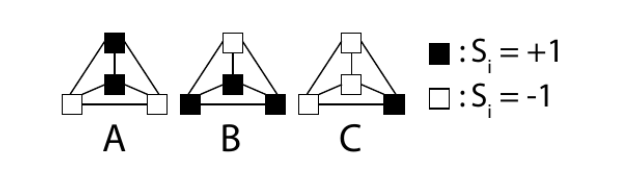

In [5]:
s = np.array([1,1,-1,-1]) # is this stable?

In [6]:
np.dot(np.dot(w,s),s)

12.0

In [7]:
from numba import njit
@njit
def asynch_update(s,w):
    #c = s.copy()
    n = np.random.randint(0,len(s))
    #print(len(s),len(w[i]))
    news = np.sign(np.sum(w[n]*s,))
    if not news:
        news = 1
    s[n] = news
    #print(c.
    E = -np.sum(np.sum(w*s, axis = 1)*s) ##?????
    return s,E
    

In [8]:
s = np.array([1,1,-1,-1]) # is this stable?
energies = []

v = s
for g in range(100):
    v,E = asynch_update(v,w)
    energies.append(E)
    
v

array([ 1,  1, -1, -1])

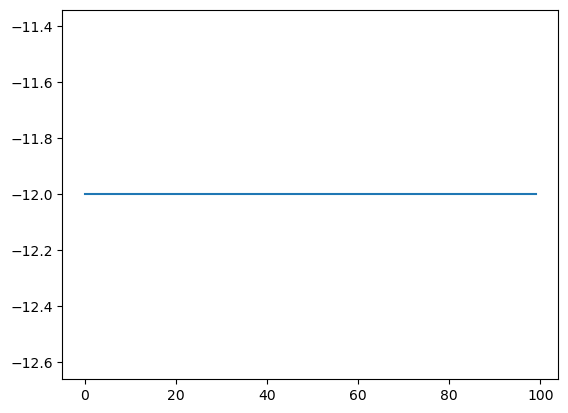

In [9]:
plt.plot(energies)

In [10]:
s = np.array([1,1,-1,-1]) # is this stable?
s = np.array([-1,1,1,1])


energies2 = []

v = s
for g in range(100):
    v,E = asynch_update(v,w)
    energies2.append(E)
    

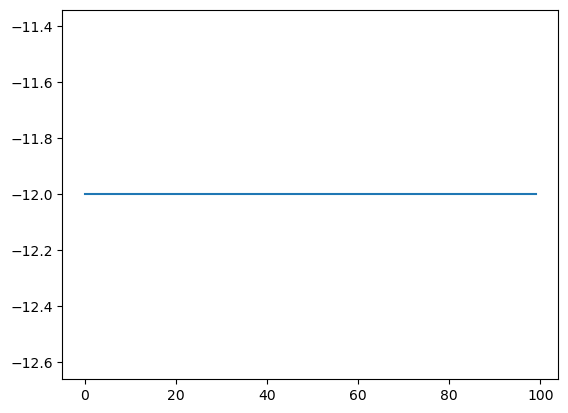

In [11]:
plt.plot(energies)

In [12]:
s = np.array([1,1,-1,-1]) # is this stable?
s = np.array([-1,1,1,1])
s = np.array([-1,-1,-1,1])
energies3 = []

v = s
for g in range(100):
    v,E = asynch_update(v,w)
    energies3.append(E)

In [13]:
np.sign(np.dot(w,s)), s

(array([-1., -1.,  1.,  1.]), array([-1, -1,  1,  1]))

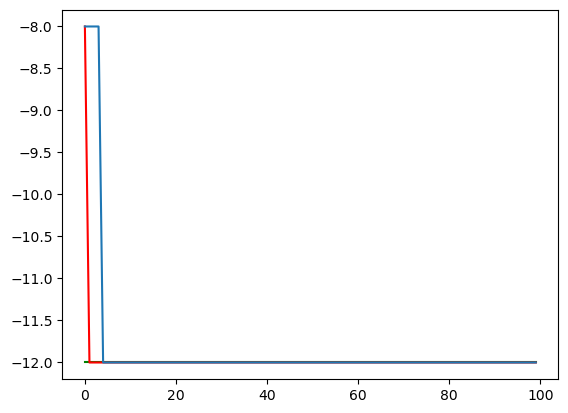

In [14]:
plt.plot(energies, color = 'green')
plt.plot(energies2, color = 'red')
plt.plot(energies3)

In [15]:
np.load('../../../Downloads/images.npz')["arr_0"][0].flatten().shape

(1200,)

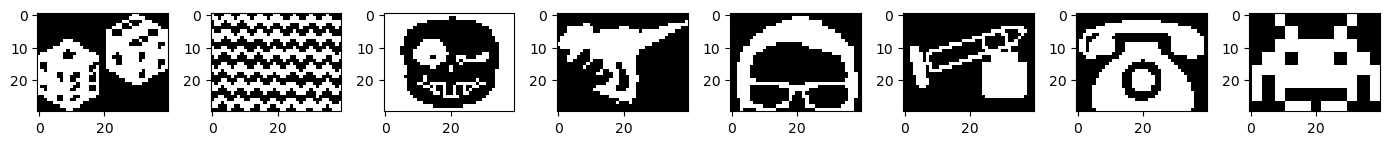

In [16]:
patterns=[]
f,ax =plt.subplots(1,8,figsize =(14,5))
for g in range(8):
    #plt.figure()
    patterns.append(np.load('../../../Downloads/images.npz')["arr_0"][g].flatten())
    ax[g].imshow(np.load('../../../Downloads/images.npz')["arr_0"][g], cmap ='Greys')
plt.tight_layout()

In [17]:
patterns = np.asarray(patterns)

In [18]:
(patterns[0] ==0).sum()

0

In [19]:
## SEE IF THE NETWORK CAN RECALL THEM, STARTING WITH RANDOM NOISE

In [20]:
## stochastic update rule

In [21]:
s0 = np.array([1,1,-1,-1]) # is this stable?
s1 = np.array([-1,1,1,1])
s2 = np.array([-1,-1,-1,1])
pattern0 = np.asarray([s0,s1,s2])

In [22]:
def hebbian_learning(patterns):
    N = patterns[0].shape[0]
    w = np.zeros((N,N))
    for i in range(N):
        w[i,i] = 0
    for i in range(N):
        for j in range(i):
            for g in range(len(patterns)):
                w[i,j] += patterns[g][i]*patterns[g][j]
                w[j,i] = w[i,j]
    return w

In [23]:
mat = hebbian_learning(patterns)

In [205]:
mat.shape

(1200, 1200)

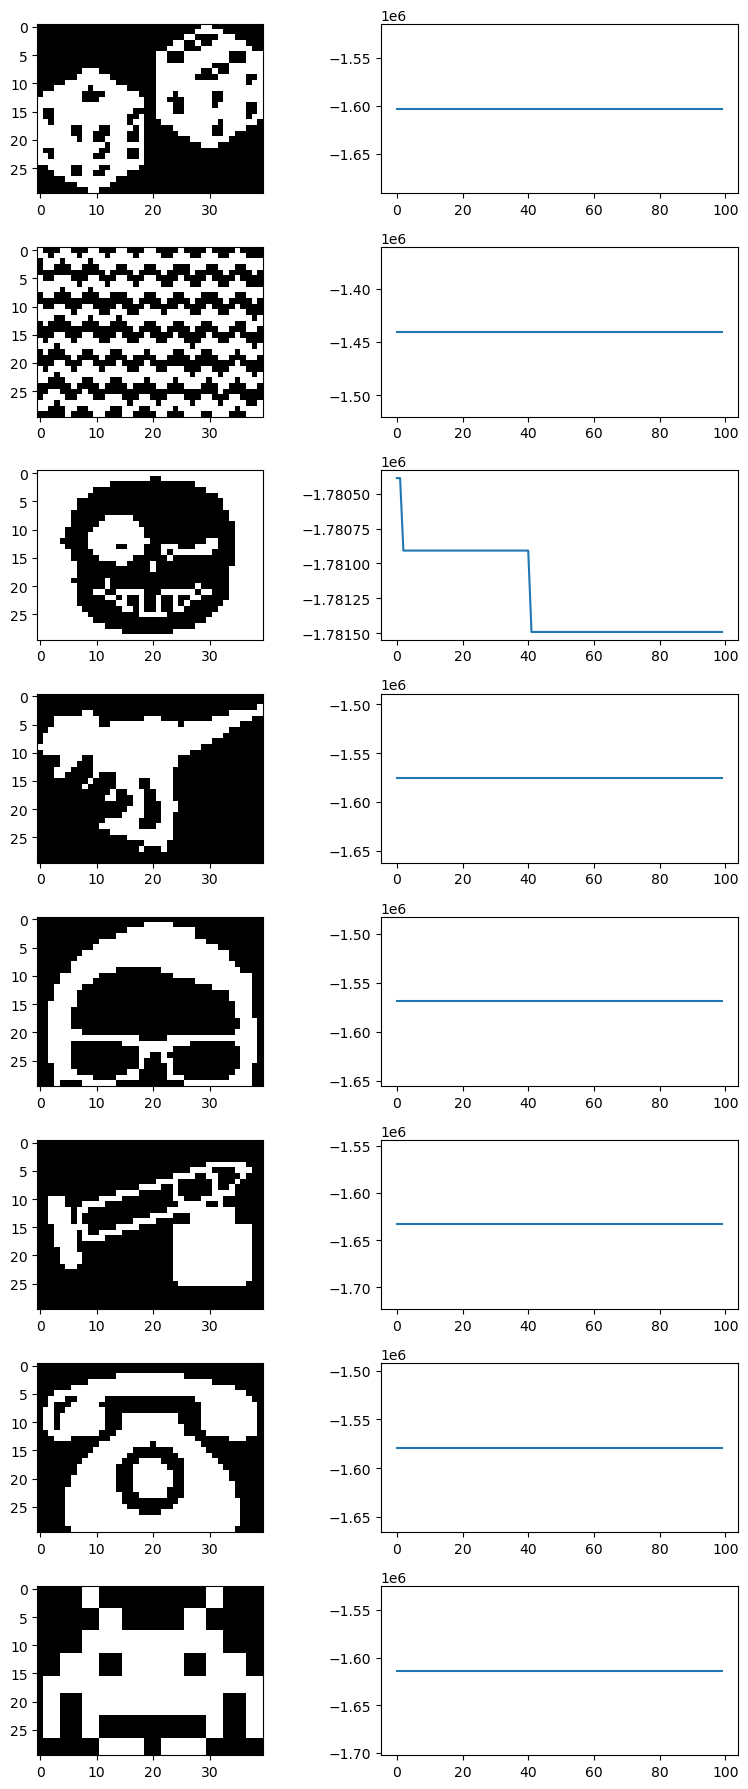

In [221]:
f,ax = plt.subplots(8,2,figsize= (8,18))
for g in range(8):
    
    
    s = patterns[g]
    energies = []

    v = s
    for j in range(100):
        v,E = asynch_update(v,mat)
        energies.append(E)

    ax[g,0].imshow(v.reshape(30,40), cmap = 'Greys')
    ax[g,1].plot(energies)
plt.tight_layout()

In [234]:
start_pattern = np.random.choice([1,-1],size = 1200)

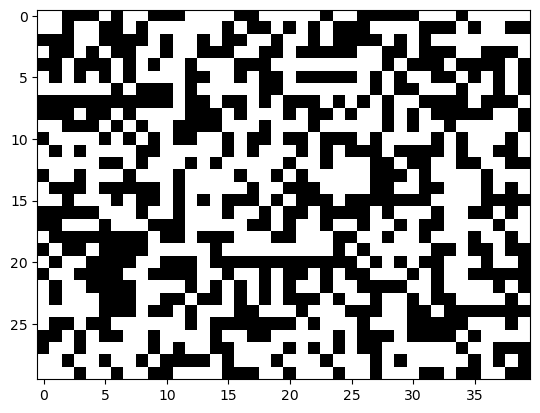

In [235]:
plt.imshow(start_pattern.reshape(30,40), cmap = 'Greys');

In [39]:
@njit
def loop(s, niter):
    energies =[]
    v = s
    for j in range(niter):
        v,E = asynch_update(v,mat)
        energies.append(E)
    return v, energies


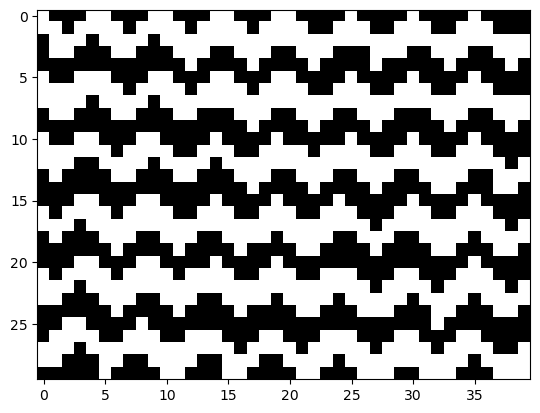

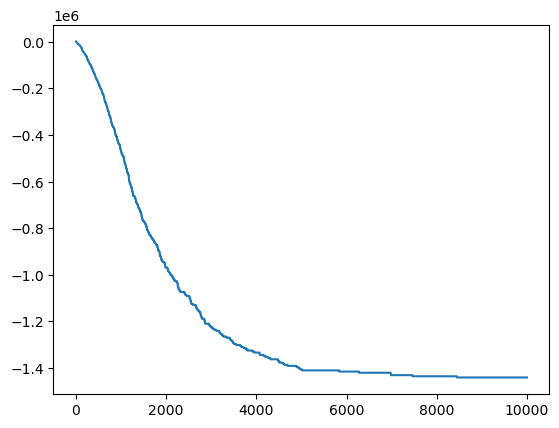

In [247]:
start_pattern = np.random.choice([1,-1],size = 1200)
s = start_pattern
v, energies = loop(s,10000)

plt.imshow(v.reshape(30,40), cmap = 'Greys')
plt.figure()
plt.plot(energies)

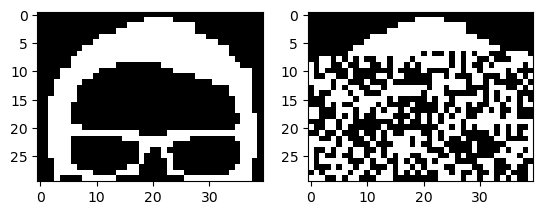

In [37]:
f,ax = plt.subplots(1,2)

g = 4
start_pattern = np.random.choice([1,-1],size = 1200)
N = 1200
start_pattern[:int(0.25*N)] = patterns[g][:int(0.25*N)]
s = start_pattern
ax[0].imshow(patterns[g].reshape(30,40), cmap = 'Greys')
ax[1].imshow(start_pattern.reshape(30,40), cmap = 'Greys')
#x[2].imshow(v.reshape(30,40), cmap = 'Greys')


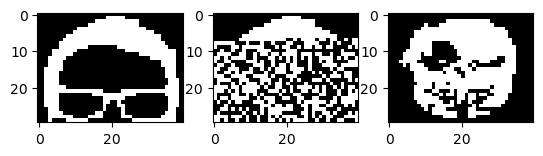

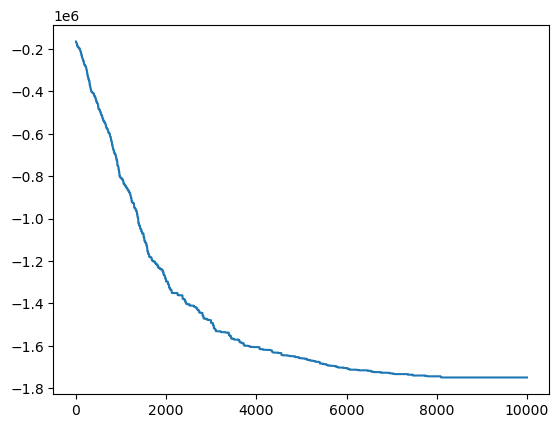

In [38]:
g = 4
start_pattern = np.random.choice([1,-1],size = 1200)
N = 1200
start_pattern[:int(0.25*N)] = patterns[g][:int(0.25*N)]
s = start_pattern.copy()
v, energies = loop(s,10000)

f,ax = plt.subplots(1,3)
ax[0].imshow(patterns[g].reshape(30,40), cmap = 'Greys')
ax[1].imshow(start_pattern.reshape(30,40), cmap = 'Greys')
ax[2].imshow(v.reshape(30,40), cmap = 'Greys')

plt.figure()
plt.plot(energies)

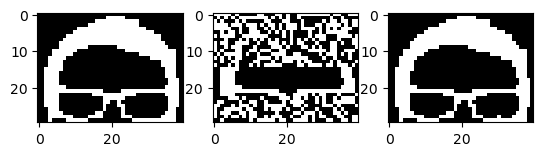

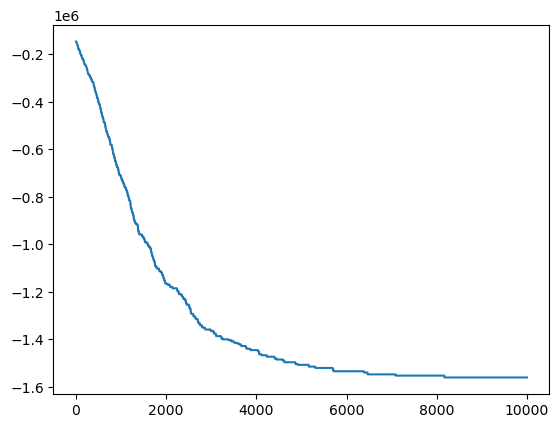

In [40]:
g = 4
start_pattern = np.random.choice([1,-1],size = 1200)
N = 1200
start_pattern[600:600+int(0.25*N)] = patterns[g][600:600+int(0.25*N)]
s = start_pattern.copy()
v, energies = loop(s,10000)

f,ax = plt.subplots(1,3)
ax[0].imshow(patterns[g].reshape(30,40), cmap = 'Greys')
ax[1].imshow(start_pattern.reshape(30,40), cmap = 'Greys')
ax[2].imshow(v.reshape(30,40), cmap = 'Greys')

plt.figure()
plt.plot(energies)